# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

#display options for pandas
pd.set_option('display.max_columns', None)


# **2. Load and Inspect the Data**

In [ ]:
# Load the dataset
data = pd.read_csv('train.csv')
print(data.head())
print(data.info())
print(data.describe())

# Check unique values for categorical variables
print(data['beer/style'].value_counts())
print(data['user/gender'].value_counts())


   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4

# **3. Data Cleaning**

In [ ]:
# Handle missing values
data.fillna('', inplace=True)


data['beer/style'] = data['beer/style'].astype('category')
data['user/gender'] = data['user/gender'].astype('category')


<ipython-input-9-4f3bf0b9e4ed>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('', inplace=True)


# **4: Exploratory Data Analysis (EDA)**

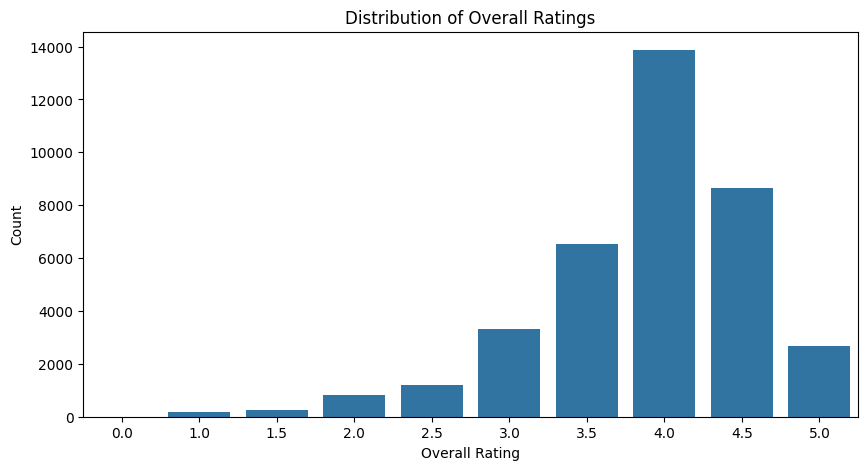

In [ ]:
# Plot the distribution of overall ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='review/overall', data=data)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-11-65c096a4a7fa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_style = data.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)


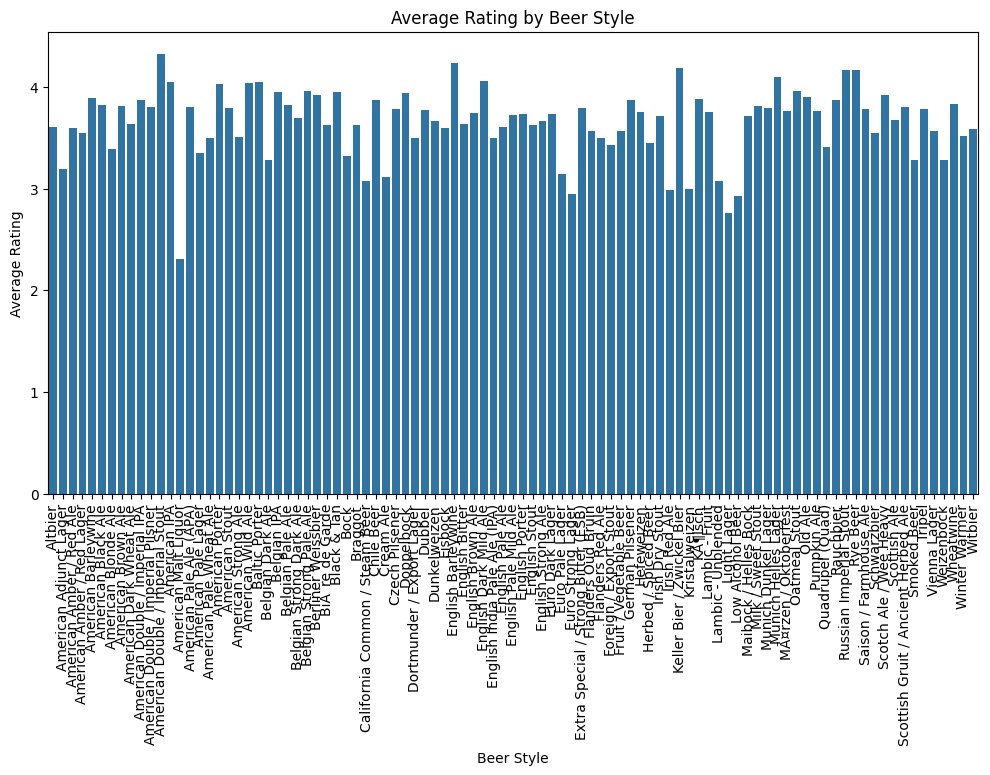

In [ ]:
# Group by beer style and calculate the mean rating
avg_rating_by_style = data.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)

# Plot the average ratings by beer style
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_style.index, y=avg_rating_by_style.values)
plt.title('Average Rating by Beer Style')
plt.xticks(rotation=90)
plt.xlabel('Beer Style')
plt.ylabel('Average Rating')
plt.show()


<ipython-input-13-4eac5ab5c8df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_by_style.index, y=reviews_by_style.values, palette='Spectral')


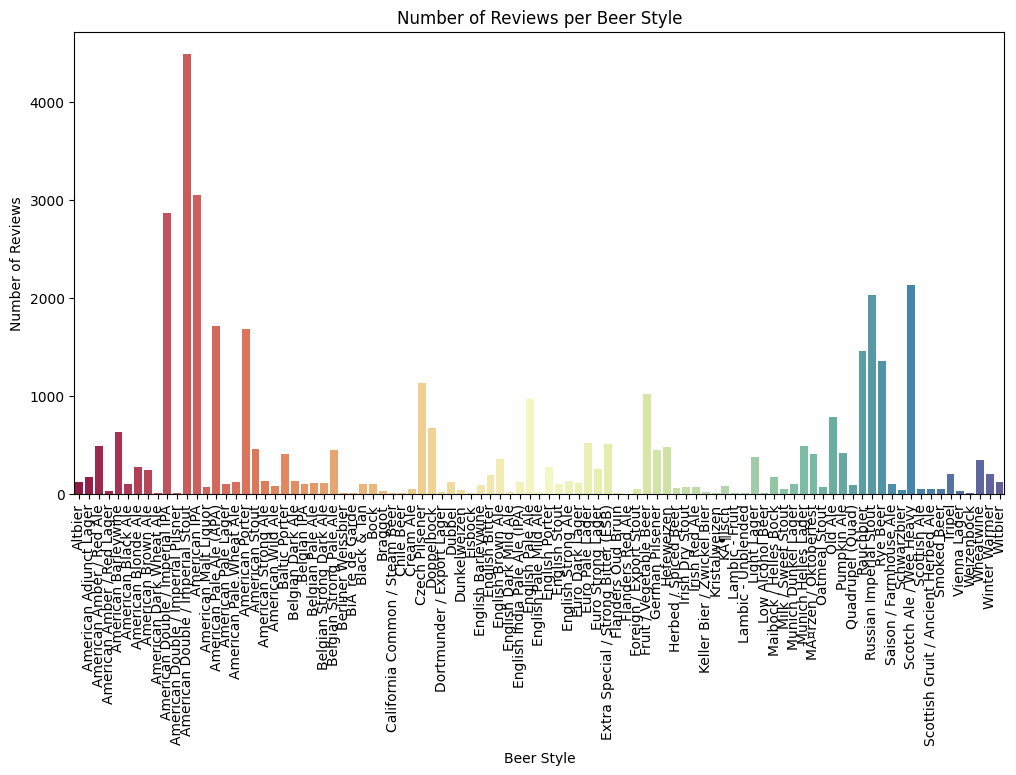

In [ ]:
# Count the number of reviews per beer style
reviews_by_style = data['beer/style'].value_counts()

# Plot the number of reviews for each beer style
plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_by_style.index, y=reviews_by_style.values, palette='Spectral')
plt.title('Number of Reviews per Beer Style')
plt.xticks(rotation=90)
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.show()


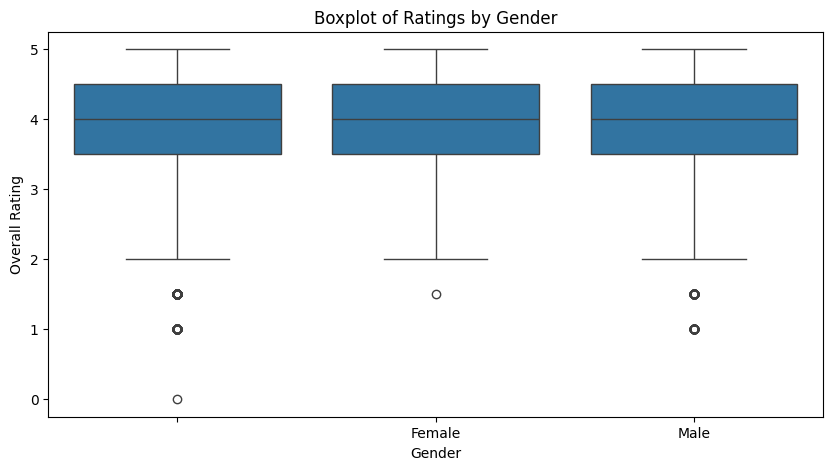

In [ ]:
# Plot the ratings by gender
plt.figure(figsize=(10, 5))
sns.boxplot(x='user/gender', y='review/overall', data=data)
plt.title('Boxplot of Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Overall Rating')
plt.show()


# **5: Feature Engineering**

In [ ]:
# One-hot encode categorical variables
X_cat = pd.get_dummies(data[['beer/name', 'beer/style', 'user/gender']], drop_first=True)


In [ ]:
# Vectorize the 'review/text' column
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
text_features = tfidf_vectorizer.fit_transform(data['review/text']).toarray()

# Combine one-hot encoded features with text features
X = np.hstack((X_cat, text_features))


In [ ]:
# Convert the target variable into a binary classification problem
y = data['review/overall'].apply(lambda x: 1 if x > 3 else 0)


# **6. Split the Data into Train and Test Sets**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **7. Build and Train Machine Learning Models**

In [ ]:
#Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
#AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

# **8. Model Evaluation**

In [ ]:
# Function to evaluate the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print("\n")

# Make predictions for each model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_ada = ada_clf.predict(X_test)

# Evaluate models
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Classifier")
evaluate_model(y_test, y_pred_ada, "AdaBoost Classifier")

Model: Logistic Regression
Accuracy: 0.8843
F1 Score: 0.9344
Precision: 0.8965
Recall: 0.9755


Model: Random Forest Classifier
Accuracy: 0.8555
F1 Score: 0.9210
Precision: 0.8552
Recall: 0.9978


Model: Gradient Boosting Classifier
Accuracy: 0.8620
F1 Score: 0.9237
Precision: 0.8661
Recall: 0.9896


Model: AdaBoost Classifier
Accuracy: 0.8679
F1 Score: 0.9254
Precision: 0.8840
Recall: 0.9709


